In [1]:
import mne
import Sleep_Scripts.PCA as P
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data
# files = [
#     "D:/Intercranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr",
#     "D:/Intercranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr",
#     "D:/Intercranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr"
# ]
# 
# raw_list = [mne.io.read_raw_brainvision(f, preload=True) for f in files]
# 
# raw = mne.concatenate_raws(raw_list)
raw = mne.io.read_raw_brainvision("D:/Intercranial_sleep_data/31/iEEG/converted/31_night1_02.vhdr", preload=True)

Extracting parameters from D:/Intercranial_sleep_data/31/iEEG/converted/31_night1_02.vhdr...
Setting channel info structure...
Reading 0 ... 899967  =      0.000 ...  3599.868 secs...


In [3]:
# Electrode coordinates in dict, when plotting data
# ch_pos = """TBAL01,-14.7597476322,-6.0460235101,-25.5850007858,3.0,0.0,0.0,1.0
# TBAL02,-23.8502152247,-7.70579691945,-27.6707326656,3.0,0.0,0.0,1.0
# TBAL03,-32.4608618068,-12.6057765014,-29.63862474,3.0,0.0,0.0,1.0
# TBAL04,-41.370943494,-16.1057770418,-27.2858877757,3.0,0.0,0.0,1.0
# TBAR01,21.2692424822,5.55464401557,-30.1200892402,3.0,0.0,0.0,1.0
# TBAR02,28.1692503576,-3.79814041336,-37.3024835687,3.0,0.0,0.0,1.0
# TBAR03,37.5692568698,-11.3284314731,-41.4334355564,3.0,0.0,0.0,1.0
# TBAR04,43.1692432567,-15.5635416157,-39.246865846,3.0,0.0,0.0,1.0
# TBPL01,-23.478251022,-13.1057756875,-33.3071591505,3.0,0.0,0.0,1.0
# TBPL02,-33.5012997336,-13.7057761814,-39.0027410899,3.0,0.0,0.0,1.0
# TBPL03,-45.801073729,-13.0057764103,-36.6366464371,3.0,0.0,0.0,1.0
# TBPL04,-52.4781443242,-23.2753493694,-31.7442255101,3.0,0.0,0.0,1.0
# TBPR01,20.6446672648,-21.6057967717,-19.6160681079,3.0,0.0,0.0,1.0
# TBPR02,30.7692376934,-23.65680533,-25.8999656924,3.0,0.0,0.0,1.0
# TBPR03,43.1692432567,-23.3569327329,-30.1174648231,3.0,0.0,0.0,1.0
# TBPR04,50.5459098816,-20.6685314178,-27.4362754822,3.0,0.0,0.0,1.0
# TL01,-27.8025787284,2.94381197154,-25.7704129743,3.0,0.0,0.0,1.0
# TL02,-27.9365535293,-0.279436019242,-23.7418962605,3.0,0.0,0.0,1.0
# TL03,-28.0707225378,-3.50735637725,-21.1212751002,3.0,0.0,0.0,1.0
# TL04,-28.2295310669,-7.32820944667,-18.2068963446,3.0,0.0,0.0,1.0
# TL05,-28.3396384753,-9.97725515117,-16.4586378269,3.0,0.0,0.0,1.0
# TL06,-28.4989150123,-13.8092139509,-13.5360229063,3.0,0.0,0.0,1.0
# TL07,-28.6584652797,-17.6477583006,-11.1994184237,3.0,0.0,0.0,1.0
# TL08,-28.8305926124,-21.78895962,-8.56481415359,3.0,0.0,0.0,1.0
# TL09,-29.015366183,-26.2344823097,-5.92694205245,3.0,0.0,0.0,1.0
# TL10,-29.1881556051,-30.3916128605,-2.68966251791,3.0,0.0,0.0,1.0
# TLL01,-47.8871924903,-72.5484123087,18.1256679487,3.0,0.0,0.0,1.0
# TLL02,-52.9486591588,-66.2035528005,11.3705646227,3.0,0.0,0.0,1.0
# TLL03,-57.5667604801,-59.7549015954,6.16475846109,3.0,0.0,0.0,1.0
# TLL04,-61.3207819246,-51.8835704436,-0.649540821411,3.0,0.0,0.0,1.0
# TLL05,-62.1513350833,-43.9877113335,-8.1682017328,3.0,0.0,0.0,1.0
# TLL06,-59.9517782305,-36.5551807906,-14.0210782192,3.0,0.0,0.0,1.0
# TLR01,50.9354580199,-61.2221223265,35.6122598906,3.0,0.0,0.0,1.0
# TLR02,56.3130495324,-57.5204924895,26.8586421252,3.0,0.0,0.0,1.0
# TLR03,60.3850664507,-53.4868406374,17.6509928111,3.0,0.0,0.0,1.0
# TLR04,63.5416089254,-48.8778620888,8.17602884676,3.0,0.0,0.0,1.0
# TLR05,62.279967278,-43.1869707932,-1.92096520101,3.0,0.0,0.0,1.0
# TLR06,61.2345414416,-37.6393440826,-11.7239910971,3.0,0.0,0.0,1.0
# TR01,33.3714097913,-4.4088639018,-18.7292952372,3.0,0.0,0.0,1.0
# TR02,33.3510352113,-9.47626908733,-15.0937380628,3.0,0.0,0.0,1.0
# TR03,33.3342005433,-13.6646346592,-11.566355921,3.0,0.0,0.0,1.0
# TR04,33.3182376484,-17.6344374532,-8.69896375808,3.0,0.0,0.0,1.0
# TR05,33.3035979759,-21.2750296433,-6.38186984,3.0,0.0,0.0,1.0
# TR06,33.2889588438,-24.9171582312,-3.18123325233,3.0,0.0,0.0,1.0
# TR07,33.2765329151,-28.0086550114,-0.64169525692,3.0,0.0,0.0,1.0
# TR08,33.2620909232,-31.5997591186,2.09893684532,3.0,0.0,0.0,1.0
# TR09,33.247440994,-35.2437181225,4.74957913061,3.0,0.0,0.0,1.0
# TR10,33.2310138769,-39.3311978161,8.39535551481,3.0,0.0,0.0,1.0
# """
# final_names = [
#     "TR10","TR09","TR08","TR07","TR06","TR05","TR04","TR03","TR02","TR01",
#     "TLR06","TLR05","TLR04","TLR03","TLR02","TLR01",
#     "TLL06","TLL05","TLL04","TLL03","TLL02","TLL01",
#     "TL10","TL09","TL08","TL07","TL06","TL05","TL04","TL03","TL02","TL01",
#     "TBPR4","TBPR3","TBPR2","TBPR1",
#     "TBPL4","TBPL3","TBPL2","TBPL1",
#     "TBAR4","TBAR3","TBAR2","TBAR1",
#     "TBAL4","TBAL3","TBAL2","TBAL1"
# ]
# non_eeg = ['Cb1','Cb2','EKG1','EKG2','T5','T6','C3','Cz','C4','Oz','EOG1','EOG2','EMG1','EMG2']
# raw.set_channel_types({ch: 'misc' for ch in non_eeg})
# ch_pos = P.parse_positions_with_mapping(ch_pos, final_names, to_meters=True)
# print(ch_pos)
# 
# 
# montage = mne.channels.make_dig_montage(ch_pos=ch_pos, coord_frame="head")
# 
# raw.set_montage(montage)

raw_pos = ch_pos = """FLL1,-38.8960647583,26.1533069611,-15.7438306808,3.0,0.0,0.0,1.0
FLL2,-44.7425765991,29.7755851746,-10.8917989731,3.0,0.0,0.0,1.0
FLL3,-49.629486084,34.163936615,-0.700468957424,3.0,0.0,0.0,1.0
FLL4,-47.4780273438,37.2083473206,9.87964725494,3.0,0.0,0.0,1.0
FLL5,-44.97751502,38.2090227908,20.5345882839,3.0,0.0,0.0,1.0
FLL6,-38.3348617554,33.8841514587,28.3331413269,3.0,0.0,0.0,1.0
FLL7,-34.2773170471,30.8028125763,37.0787353516,3.0,0.0,0.0,1.0
FLL8,-28.9478645325,25.1875839233,44.9578323364,3.0,0.0,0.0,1.0
FLR1,45.5613212585,37.0331764221,-18.2593536377,3.0,0.0,0.0,1.0
FLR2,52.3715085979,44.0232100048,-10.3031121899,3.0,0.0,0.0,1.0
FLR3,55.5765823881,45.1188503334,2.54659263764,3.0,0.0,0.0,1.0
FLR4,52.3771636679,42.6705655532,13.5880393691,3.0,0.0,0.0,1.0
FLR5,48.1743645951,41.4865837901,25.1249071317,3.0,0.0,0.0,1.0
FLR6,42.1192878614,36.5609666079,33.9459904594,3.0,0.0,0.0,1.0
FLR7,37.8343687841,31.0568671265,42.3780056619,3.0,0.0,0.0,1.0
FLR8,32.4382580918,27.0684735463,49.3230564713,3.0,0.0,0.0,1.0
IHLa1,-1.30424162829,38.9464367296,15.790571037,3.0,0.0,0.0,1.0
IHLa2,-0.901291945974,34.3825956097,23.9138360636,3.0,0.0,0.0,1.0
IHLa3,-0.377898694929,28.9127711419,34.7219394282,3.0,0.0,0.0,1.0
IHLa4,0.0912553010858,24.3613629904,44.6070865962,3.0,0.0,0.0,1.0
IHLb1,-0.838150179195,10.8254264698,17.2684597187,3.0,0.0,0.0,1.0
IHLb2,0.637228358468,13.2704165354,26.9962541798,3.0,0.0,0.0,1.0
IHLb3,1.97101677097,15.212213569,36.7561260502,3.0,0.0,0.0,1.0
IHLb4,0.393918456386,16.1182423906,48.1438234228,3.0,0.0,0.0,1.0
IHRa1,3.15101791702,61.609163611,-5.63499906777,3.0,0.0,0.0,1.0
IHRa2,3.7299506623,54.3612502397,5.10970492429,3.0,0.0,0.0,1.0
IHRa3,4.1631252052,48.9381002459,14.0410670976,3.0,0.0,0.0,1.0
IHRa4,4.81125835846,40.8238413901,23.8426419594,3.0,0.0,0.0,1.0
IHRa5,5.24226005332,35.4279323758,33.6222663931,3.0,0.0,0.0,1.0
IHRa6,5.24346404669,29.2009855078,42.5176496897,3.0,0.0,0.0,1.0
IHRb1,1.64917949517,2.62429115925,23.6580307884,3.0,0.0,0.0,1.0
IHRb2,3.3685230913,2.62429115925,34.8337641633,3.0,0.0,0.0,1.0
IHRb3,4.22819488937,2.62429115925,45.1498257401,3.0,0.0,0.0,1.0
IHRb4,10.2458974758,2.62429115925,54.6062155188,3.0,0.0,0.0,1.0
TBAL1,-30.2294188886,21.5570279566,-34.4190879628,3.0,0.0,0.0,1.0
TBAL2,-41.0695295473,20.2505007747,-35.16014031,3.0,0.0,0.0,1.0
TBAL3,-49.1488170028,10.1513914554,-35.16014031,3.0,0.0,0.0,1.0
TBAL4,-53.1884607306,-0.620991818643,-35.16014031,3.0,0.0,0.0,1.0
TBAR1,29.3231372833,-2.7532851696,-40.4227409363,3.0,0.0,0.0,1.0
TBAR2,37.7749137878,-5.12896537781,-37.9893951416,3.0,0.0,0.0,1.0
TBAR3,43.6539421082,-6.16945266724,-34.6632575989,3.0,0.0,0.0,1.0
TBAR4,54.687122345,-9.1097869873,-32.3367080688,3.0,0.0,0.0,1.0
TBPL1,-21.8035850525,6.15693044662,-35.2468299866,3.0,0.0,0.0,1.0
TBPL2,-29.0554214333,4.78417779455,-44.2967938164,3.0,0.0,0.0,1.0
TBPL3,-40.1314523263,-1.44608958279,-44.2967938164,3.0,0.0,0.0,1.0
TBPL4,-45.5731048584,-7.7487154007,-37.952457428,3.0,0.0,0.0,1.0
TBPR1,21.5638674649,-11.5157541299,-30.4921902899,3.0,0.0,0.0,1.0
TBPR2,32.1478285436,-14.1617443996,-30.4921902899,3.0,0.0,0.0,1.0
TBPR3,42.7317896222,-16.2785366153,-30.4921902899,3.0,0.0,0.0,1.0
TBPR4,54.3741468087,-16.8077346692,-30.4921902899,3.0,0.0,0.0,1.0
TL1,-26.2300791137,2.17295648042,-36.0073696143,3.0,0.0,0.0,1.0
TL10,-26.7875396842,-32.5921745129,-5.78268229843,3.0,0.0,0.0,1.0
TL2,-26.3416663638,-1.78344396316,-33.0547583851,3.0,0.0,0.0,1.0
TL3,-26.3782227148,-5.49767983989,-29.5929017091,3.0,0.0,0.0,1.0
TL4,-26.4652370244,-9.46478526187,-26.3807158012,3.0,0.0,0.0,1.0
TL5,-26.4770134157,-13.18303759,-22.6640901324,3.0,0.0,0.0,1.0
TL6,-26.5890641913,-17.1620713791,-19.6928193351,3.0,0.0,0.0,1.0
TL7,-26.6514728686,-21.1408710522,-16.2195606583,3.0,0.0,0.0,1.0
TL8,-26.6882195469,-24.8707176223,-12.7435251741,3.0,0.0,0.0,1.0
TL9,-26.7257723476,-28.8513843399,-9.01694694165,3.0,0.0,0.0,1.0
TLL1,-46.4079360962,-70.0992736816,14.5726451874,3.0,0.0,0.0,1.0
TLL2,-54.3142251295,-65.9634241501,8.11999352925,3.0,0.0,0.0,1.0
TLL3,-59.8117812198,-59.85745295,0.596317954121,3.0,0.0,0.0,1.0
TLL4,-64.5311058702,-49.32236,-4.5774546427,3.0,0.0,0.0,1.0
TLL5,-64.2804598777,-40.0811620314,-9.60045422109,3.0,0.0,0.0,1.0
TLL6,-64.2266303661,-29.1752682241,-13.791498126,3.0,0.0,0.0,1.0
TLR1,45.0727412983,-45.3522908629,51.9755072832,3.0,0.0,0.0,1.0
TLR10,52.5773787718,-48.4850723999,37.8464630986,3.0,0.0,0.0,1.0
TLR11,57.6223240728,-44.6093796905,29.1961420341,3.0,0.0,0.0,1.0
TLR12,61.9447182611,-40.8932034574,22.0151779159,3.0,0.0,0.0,1.0
TLR13,64.7454475146,-36.195118454,13.9236949666,3.0,0.0,0.0,1.0
TLR14,64.4614650844,-30.4887828393,4.78164266662,3.0,0.0,0.0,1.0
TLR15,63.0983446603,-25.3326418447,-5.0186092704,3.0,0.0,0.0,1.0
TLR16,61.8033012661,-20.1274451114,-13.7544614323,3.0,0.0,0.0,1.0
TLR2,52.4265620548,-37.7591163355,44.4212891084,3.0,0.0,0.0,1.0
TLR3,57.9715629811,-32.3043520056,35.6097663672,3.0,0.0,0.0,1.0
TLR4,62.5572138134,-28.7802492862,27.7479923811,3.0,0.0,0.0,1.0
TLR5,65.030740315,-25.3507040722,19.6249813271,3.0,0.0,0.0,1.0
TLR6,63.5074380823,-20.1752311434,10.4905864535,3.0,0.0,0.0,1.0
TLR7,62.0940699562,-14.9479424016,0.106466802179,3.0,0.0,0.0,1.0
TLR8,60.8717794694,-9.6803123913,-7.47313531779,3.0,0.0,0.0,1.0
TLR9,44.7947498349,-55.7785122086,46.5019878436,3.0,0.0,0.0,1.0
TR1,25.5419592888,5.38811763502,-38.0587723313,3.0,0.0,0.0,1.0
TR10,28.2386677475,-29.4462173722,-10.0111836672,3.0,0.0,0.0,1.0
TR2,25.812123043,1.13376661395,-35.1024931853,3.0,0.0,0.0,1.0
TR3,26.1213729826,-2.37526160265,-31.9790472692,3.0,0.0,0.0,1.0
TR4,26.4196676227,-6.22006618054,-28.8780784401,3.0,0.0,0.0,1.0
TR5,26.7614206569,-10.0421425529,-25.4370629776,3.0,0.0,0.0,1.0
TR6,27.0467412751,-14.1915224024,-22.380784803,3.0,0.0,0.0,1.0
TR7,27.3611979304,-17.9554372716,-19.1673554486,3.0,0.0,0.0,1.0
TR8,27.6288369821,-21.6946906832,-16.3296777007,3.0,0.0,0.0,1.0
TR9,27.9084853754,-25.7647154143,-13.3335588303,3.0,0.0,0.0,1.0
"""

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 5.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Filter length: 1651 samples (6.604 s)

Top channels:
PC1 -> TL05
PC2 -> EMG2


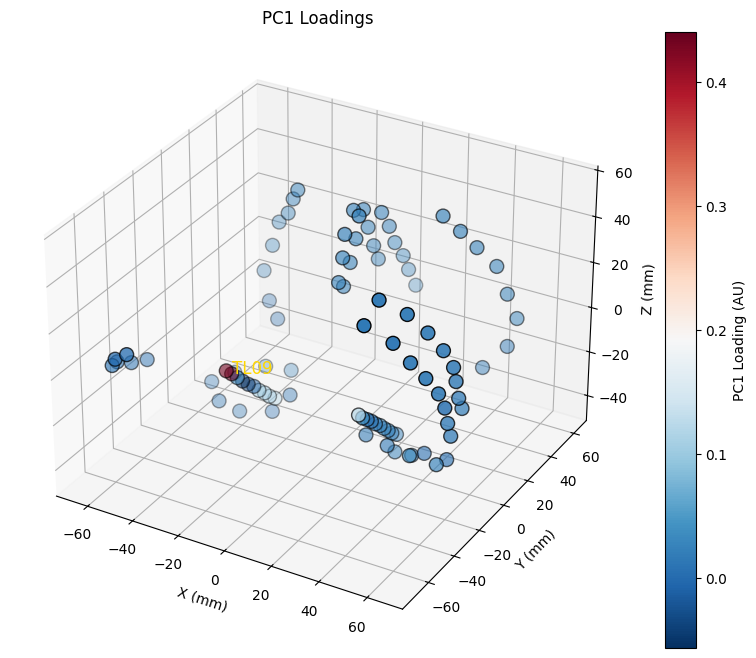

In [4]:
# band options are: beta, gamma, delta, theta, sigma, total and noise
P.channel_pca(raw, 'delta', raw_pos)